In [ ]:
!wget https://download1640.mediafire.com/i01jp395v6ngh-DoyIVk7DqCDXexjFeaSas8-l1qsErGfdENEfLfIVcpoFERw8Le5f-mXrc-jtdJFKpjra1K0MEZB2xGp0B_7SAGyugrhy5wtXnsjYP8CACv9XGxOxl_CUmw6xV_3MfOMPTVi6HoJT0m9NyE8Rk-iy9YAGFQXO2t/vo5pmleyavmgzsq/ASL_Dataset_redim.zip

--2024-10-09 12:45:46--  https://download1640.mediafire.com/i01jp395v6ngh-DoyIVk7DqCDXexjFeaSas8-l1qsErGfdENEfLfIVcpoFERw8Le5f-mXrc-jtdJFKpjra1K0MEZB2xGp0B_7SAGyugrhy5wtXnsjYP8CACv9XGxOxl_CUmw6xV_3MfOMPTVi6HoJT0m9NyE8Rk-iy9YAGFQXO2t/vo5pmleyavmgzsq/ASL_Dataset_redim.zip
Resolving download1640.mediafire.com (download1640.mediafire.com)... 199.91.152.140
Connecting to download1640.mediafire.com (download1640.mediafire.com)|199.91.152.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 624608165 (596M) [application/zip]
Saving to: ‘ASL_Dataset_redim.zip’

ASL_Dataset_redim.z 100%[===================>] 595.67M  19.3MB/s    in 33s     

2024-10-09 12:46:20 (17.9 MB/s) - ‘ASL_Dataset_redim.zip’ saved [624608165/624608165]



In [ ]:
!unzip ASL_Dataset_redim.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: content/ASL_Dataset_Redim/H/H1304.jpg  
  inflating: content/ASL_Dataset_Redim/H/1566.jpg  
  inflating: content/ASL_Dataset_Redim/H/1409.jpg  
  inflating: content/ASL_Dataset_Redim/H/H802.jpg  
  inflating: content/ASL_Dataset_Redim/H/H2416.jpg  
  inflating: content/ASL_Dataset_Redim/H/H175.jpg  
  inflating: content/ASL_Dataset_Redim/H/2871.jpg  
  inflating: content/ASL_Dataset_Redim/H/2639.jpg  
  inflating: content/ASL_Dataset_Redim/H/2032.jpg  
  inflating: content/ASL_Dataset_Redim/H/H2256.jpg  
  inflating: content/ASL_Dataset_Redim/H/2601.jpg  
  inflating: content/ASL_Dataset_Redim/H/H881.jpg  
  inflating: content/ASL_Dataset_Redim/H/H1001.jpg  
  inflating: content/ASL_Dataset_Redim/H/H1236.jpg  
  inflating: content/ASL_Dataset_Redim/H/120.jpg  
  inflating: content/ASL_Dataset_Redim/H/1733.jpg  
  inflating: content/ASL_Dataset_Redim/H/2242.jpg  
  inflating: content/ASL_Dataset_Redim/H/1313.jpg  

Importamos librerías

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

Carga de datos

In [ ]:
# Ruta al directorio del dataset
data_dir = '/content/content/ASL_Dataset_Redim'

# Parámetros
img_height, img_width = 128, 128
batch_size = 32

# Data augmentation y preprocesamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Escalar los valores de píxeles de 0-255 a 0-1
    rotation_range=40,         # Rotar las imágenes hasta 40 grados
    width_shift_range=0.2,     # Desplazar la imagen horizontalmente un 20%
    height_shift_range=0.2,    # Desplazar la imagen verticalmente un 20%
    shear_range=0.2,           # Aplicar una transformación de corte a la imagen
    zoom_range=0.2,            # Aplicar un zoom aleatorio entre 0.8x y 1.2x
    horizontal_flip=True,      # Voltear las imágenes horizontalmente
    fill_mode='nearest'        # Cómo rellenar los píxeles vacíos resultantes de las transformaciones
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'   # Clasificación en múltiples clases
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
)


Found 165670 images belonging to 28 classes.
Found 165670 images belonging to 28 classes.
Found 165670 images belonging to 28 classes.


Modelo

In [ ]:
def _conv_model():
  model = models.Sequential()
  # Primera capa convolucional
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
  model.add(layers.MaxPooling2D((2, 2)))

  # Segunda capa convolucional
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  # Aplanamiento y capas densas
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.5))  # Previene sobreajuste
  model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

  return model

Instanciamos el modelo

In [ ]:
model = _conv_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Lo compilamos

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Lo ajustamos

In [8]:
epochs = 20

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5177/5177 ━━━━━━━━━━━━━━━━━━━━ 1345s 259ms/step - accuracy: 0.3789 - loss: 2.0462 - val_accuracy: 0.8683 - val_loss: 0.3840
Epoch 2/20
   1/5177 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - accuracy: 0.7500 - loss: 0.4882

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5177/5177 ━━━━━━━━━━━━━━━━━━━━ 1s 259us/step - accuracy: 0.7500 - loss: 0.4882 - val_accuracy: 0.8333 - val_loss: 0.2535
Epoch 3/20
5177/5177 ━━━━━━━━━━━━━━━━━━━━ 1337s 258ms/step - accuracy: 0.8597 - loss: 0.4031 - val_accuracy: 0.9537 - val_loss: 0.1467
Epoch 4/20
5177/5177 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.9688 - loss: 0.1249 - val_accuracy: 0.8333 - val_loss: 0.1977
Epoch 5/20
5177/5177 ━━━━━━━━━━━━━━━━━━━━ 1332s 257ms/step - accuracy: 0.9109 - loss: 0.2629 - val_accuracy: 0.9698 - val_loss: 0.0989
Epoch 6/20
5177/5177 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.9062 - loss: 0.4886 - val_accuracy: 1.0000 - val_loss: 0.1222
Epoch 7/20
5177/5177 ━━━━━━━━━━━━━━━━━━━━ 1335s 258ms/step - accuracy: 0.9339 - loss: 0.1999 - val_accuracy: 0.9719 - val_loss: 0.0868
Epoch 8/20
5177/5177 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.9375 - loss: 0.2052 - val_accuracy: 1.0000 - val_loss: 0.0079
Epoch 9/20
5177/5177 ━━━━━━━━━━━━━━━━━━━━ 1330s 257ms/step - accuracy: 0.9466 - loss

Lo evaluamos

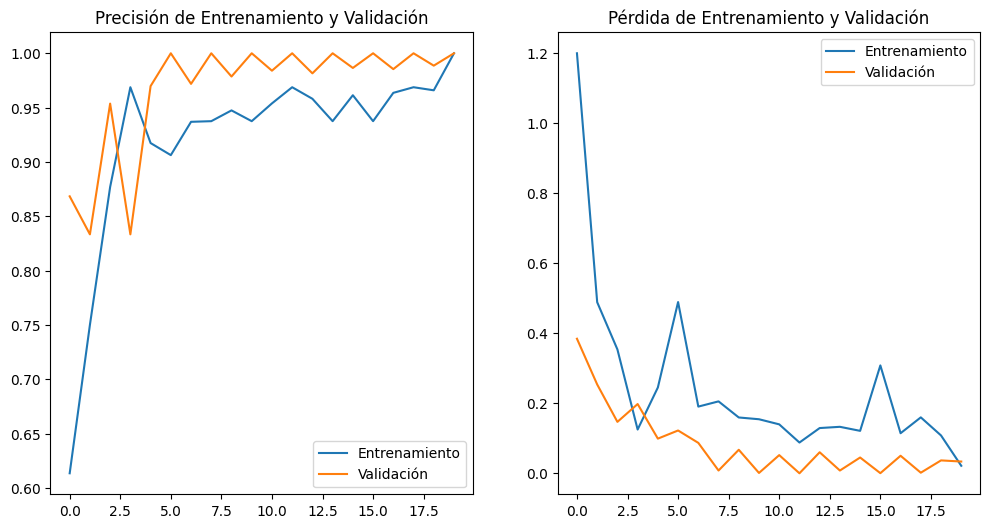

In [9]:
# Graficar precisión y pérdida
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Entrenamiento')
plt.plot(epochs_range, val_acc, label='Validación')
plt.legend(loc='lower right')
plt.title('Precisión de Entrenamiento y Validación')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Entrenamiento')
plt.plot(epochs_range, val_loss, label='Validación')
plt.legend(loc='upper right')
plt.title('Pérdida de Entrenamiento y Validación')
plt.show()

Lo almacenamos

In [11]:
model.save('arq_modelo_5.h5')
model.save('arq_modelo_5.keras')

Predicciones

In [17]:
from tensorflow.keras.preprocessing import image

def predict_sign(img_path, model, class_indices):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalizar
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Invertir el diccionario de class_indices
    class_labels = {v: k for k, v in class_indices.items()}
    return class_labels[predicted_class[0]]

# Ejemplo de uso
# Asegúrate de que la ruta a tu imagen sea correcta
sign = predict_sign('/content/TestData/l_invert.jpg', model, train_generator.class_indices)
print("La seña predicha es:", sign)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
La seña predicha es: Space
